In [1]:
from utils import loadAllTSPs, calcDist_EUC, GA_cost, create_GA_fitness, ansViz, clustering, create_clustering_fitness

data = loadAllTSPs('./tsplib/')

In [2]:
# let's take a square grid as an example and append it to the data
square_grid = []
for i in range(0, 10):
    for j in range(0, 10):
        square_grid.append([float(i), float(j)])
data = [square_grid, *data]
print(len(data[3]), len(data[3]), len(data[3]))

48 48 48


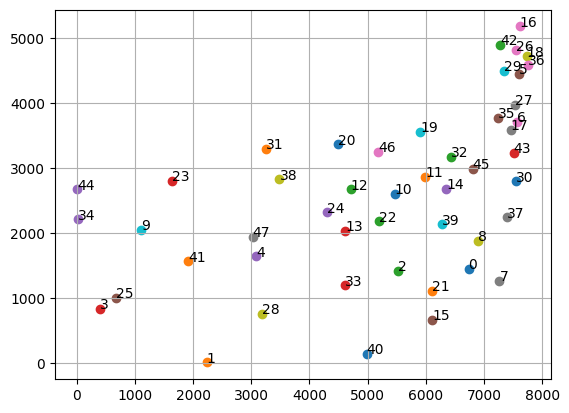

In [3]:
# show the data
import matplotlib.pyplot as plt

# label each point by its index
for i, point in enumerate(data[3]):
    plt.scatter(point[0], point[1])
    plt.text(point[0], point[1], str(i))

plt.grid()
plt.show()

In [4]:
distMat = calcDist_EUC(data[3])

In [5]:
data[3]

[[6734.0, 1453.0],
 [2233.0, 10.0],
 [5530.0, 1424.0],
 [401.0, 841.0],
 [3082.0, 1644.0],
 [7608.0, 4458.0],
 [7573.0, 3716.0],
 [7265.0, 1268.0],
 [6898.0, 1885.0],
 [1112.0, 2049.0],
 [5468.0, 2606.0],
 [5989.0, 2873.0],
 [4706.0, 2674.0],
 [4612.0, 2035.0],
 [6347.0, 2683.0],
 [6107.0, 669.0],
 [7611.0, 5184.0],
 [7462.0, 3590.0],
 [7732.0, 4723.0],
 [5900.0, 3561.0],
 [4483.0, 3369.0],
 [6101.0, 1110.0],
 [5199.0, 2182.0],
 [1633.0, 2809.0],
 [4307.0, 2322.0],
 [675.0, 1006.0],
 [7555.0, 4819.0],
 [7541.0, 3981.0],
 [3177.0, 756.0],
 [7352.0, 4506.0],
 [7545.0, 2801.0],
 [3245.0, 3305.0],
 [6426.0, 3173.0],
 [4608.0, 1198.0],
 [23.0, 2216.0],
 [7248.0, 3779.0],
 [7762.0, 4595.0],
 [7392.0, 2244.0],
 [3484.0, 2829.0],
 [6271.0, 2135.0],
 [4985.0, 140.0],
 [1916.0, 1569.0],
 [7280.0, 4899.0],
 [7509.0, 3239.0],
 [10.0, 2676.0],
 [6807.0, 2993.0],
 [5185.0, 3258.0],
 [3023.0, 1942.0]]

In [6]:
# (clusters, ordered_hubs, total_cost)=clustering(data[3], distMat, 78, "NN", True)
# print("Total cost of the clustering: ", total_cost)

In [7]:
# # visualize the clusters each in different colors
# for i, cluster in enumerate(clusters):
#     for point in cluster:
#         plt.scatter(data[3][point][0], data[3][point][1], color=plt.cm.tab20(i))

# # draw ring between hubs in green
# for i in range(len(ordered_hubs)):
#     plt.plot([data[3][ordered_hubs[i]][0], data[3][ordered_hubs[(i+1)%len(ordered_hubs)]][0]], [data[3][ordered_hubs[i]][1], data[3][ordered_hubs[(i+1)%len(ordered_hubs)]][1]], color='green')
# plt.grid()
# plt.show()

In [8]:
# (clusters, ordered_hubs, total_cost)=clustering(data[3], distMat, 100, "NN", True)
# print("Total cost of the clustering: ", total_cost)

In [9]:
# # visualize the clusters each in different colors
# for i, cluster in enumerate(clusters):
#     for point in cluster:
#         plt.scatter(data[3][point][0], data[3][point][1], color=plt.cm.tab20(i))

# # draw ring between hubs in green
# for i in range(len(ordered_hubs)):
#     plt.plot([data[3][ordered_hubs[i]][0], data[3][ordered_hubs[(i+1)%len(ordered_hubs)]][0]], [data[3][ordered_hubs[i]][1], data[3][ordered_hubs[(i+1)%len(ordered_hubs)]][1]], color='green')
# plt.grid()
# plt.show()

In [10]:
# create_clustering_fitness(data[3], distMat, "NN")(_,[75], 1)

In [11]:
import pygad
import numpy as np

num_generations = 100
sol_per_pop = 20

# Initialize a PyGAD instance
# solution is a single discrete integere of range 3 to len(data[3])//2
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=10,
    fitness_func=create_clustering_fitness(data[3], distMat, "NN"),
    sol_per_pop=sol_per_pop,
    num_genes=1,
    init_range_low=3,
    init_range_high=len(data[3])*11//12,
    gene_type=int,
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type=None
)
ga_instance.run()

c:\Github\Ring-Star-Problem-Study\.venv\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [12]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

Parameters of the best solution : [20]
Fitness value of the best solution = 0.0014717682359923093


In [13]:
(clusters, ordered_hubs, total_cost)=clustering(data[3], distMat, solution[0], "NN", True)
print("Total cost of the clustering: ", total_cost)

ValueError: n_samples=48 should be >= n_clusters=68.

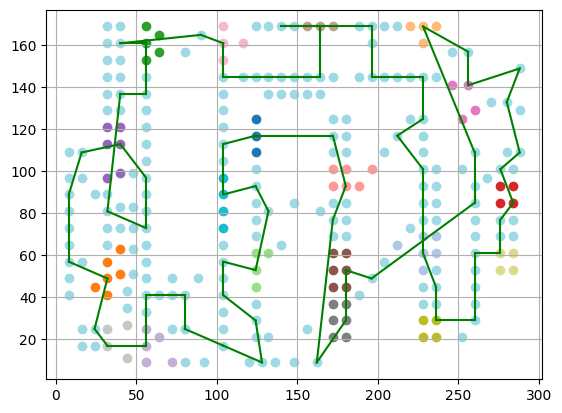

In [ ]:
# visualize the clusters each in different colors
for i, cluster in enumerate(clusters):
    for point in cluster:
        plt.scatter(data[3][point][0], data[3][point][1], color=plt.cm.tab20(i))

# draw ring between hubs in green
for i in range(len(ordered_hubs)):
    plt.plot([data[3][ordered_hubs[i]][0], data[3][ordered_hubs[(i+1)%len(ordered_hubs)]][0]], [data[3][ordered_hubs[i]][1], data[3][ordered_hubs[(i+1)%len(ordered_hubs)]][1]], color='green')
plt.grid()
plt.show()